In [1]:
import numpy as np  

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# ipynbのインポート
import nbimporter
import common_data as CD

Importing Jupyter notebook from common_data.ipynb


# 家電機器

## 12.　電気炊飯器（ver自立P4）

電気炊飯器の動作状態および機能は、以下を想定する。

* 稼働－炊飯
* 稼働－保温
* 待機

保温機能は、居住者の使用行動により使用の有無が決定される。

想定する動作状態および機能に対応する添え字は、以下のとおりである。

|機器の動作状態 |機器の機能 |添え字 |備考  　　　|  
|:-------------:|:---------:|:-----:|:----------:|    
|稼働           |炊飯       |opg,ck |-     　　　|  
|稼働           |保温       |opg,kp |-     　　　|  
|待機           |-          |sby    |-     　　　| 

### 12.2　消費電力量

日付$d$の時刻$t$における電気炊飯器の消費電力量$E_{E,RiceCooker,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    E_{E,RiceCooker,d,t} = E_{E,opg,d,t} + E_{E,sby,d,t} 
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$E_{E,RiceCooker,d,t}$：日付$d$の時刻$t$における電気炊飯器の単位時間当たりの消費電力量[Wh]  
$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,sby,d,t}$：日付$d$の時刻$t$における待機時の単位時間当たりの消費電力量[Wh]  

である。

In [2]:
def EE_app (EE_opg, EE_sby):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時の消費電力量[Wh]
    # EE_sby：待機時の消費電力量[Wh]
    
    return EE_opg + EE_sby

日付$d$の時刻$t$における稼働時の消費電力量$E_{E,opg,d,t}$および待機時の消費電力量$E_{E,sby,d,t}$は、式(2)および式(3)により計算される。

<p style="text-indent:2em">稼働時の消費電力：</p>  
$$ 
\begin{equation*}
    E_{E,opg,d,t} = E_{E,opg,ck,d,t} + E_{E,opg,kp,d,t}
\end{equation*}
$$


<div style="text-align: right;"> (3-1) </div>

<p style="text-indent:4em">炊飯が機能する場合：</p>   
$$ 
\begin{equation*}
    E_{E,opg,ck,d,t} = P_{opg,ck} \times dt_{opg,ck,d,t} \div 3600
\end{equation*}
$$


<div style="text-align: right;"> (3-2) </div>

<p style="text-indent:4em">保温が機能する場合：</p>   
$$ 
\begin{equation*}
    E_{E,opg,kp,d,t} = P_{opg,kp} \times dt_{opg,kp,d,t} \div 3600
\end{equation*}
$$


<div style="text-align: right;"> (3-3) </div>

<p style="text-indent:2em">待機時の消費電力：</p>    
$$ 
\begin{equation*}
    E_{E,sby,d,t} = P_{sby} \times dt_{sby,d,t} \div 3600
\end{equation*}
$$


<div style="text-align: right;"> (4) </div>

ただし、式(4)を満たす。
$$ 
\begin{equation*}
     dt_{opg,ck,d,t} + dt_{opg,kp,d,t} + dt_{sby,d,t} = dt_{calc}
\end{equation*}
$$
<div style="text-align: right;"> (5) </div>

ここで、  

$dt_{calc}$：単位時間[s]   
$dt_{opg,ck,d,t}$：日付$d$の時刻$t$において炊飯が機能することによる稼働時間の合計[s]  
$dt_{opg,kp,d,t}$：日付$d$の時刻$t$において保温が機能することによる稼働時間の合計[s]  
$dt_{sby,d,t}$：日付$d$の時刻$t$における待機時間の合計[s]   
$E_{E,opg,ck,d,t}$：日付$d$の時刻$t$において炊飯が機能することによる稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,opg,kp,d,t}$：日付$d$の時刻$t$において保温が機能することによる稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,sby,d,t}$：日付$d$の時刻$t$における待機時の単位時間当たりの消費電力量[Wh]   
$P_{opg,ck}$：炊飯が機能することによる稼働時の消費電力[W]  
$P_{opg,kp}$：保温が機能することによる稼働時の消費電力[W]  
$P_{sby}$：待機時の消費電力[W]   

である。

In [3]:
def EE_opg (EE_opg_ck, EE_opg_kp):
    '''稼働時の消費電力量[Wh]を計算する'''
    # EE_opg_ck：炊飯が機能することによる稼働時の単位時間当たりの消費電力量[Wh]
    # EE_opg_kp：保温が機能することによる稼働時の単位時間当たりの消費電力量[Wh]  
  
    return EE_opg_ck + EE_opg_kp

In [4]:
def EE_opg_ck (P_opg_ck, dt_opg_ck):
    '''炊飯が機能することによる稼働時の消費電力量[Wh]を計算する'''
    # P_opg_ck：炊飯が機能することによる稼働時の消費電力[W]    
    # dt_opg_ck：炊飯が機能することによる稼働時間の合計[s]
  
    return P_opg_ck * dt_opg_ck / 3600

In [5]:
def EE_opg_kp (P_opg_kp, dt_opg_kp):
    '''保温が機能することによる稼働時の消費電力量[Wh]を計算する'''
    # P_opg_kp：保温が機能することによる稼働時の消費電力[W]    
    # dt_opg_kp：保温が機能することによる稼働時間の合計[s]
  
    return P_opg_kp * dt_opg_kp / 3600

In [6]:
def EE_sby (P_sby, dt_sby):
    '''待機時の消費電力量[Wh]を計算する'''
    # P_sby：待機時の消費電力[W]
    # dt_sby：待機時間の合計[s]
 
    return P_sby * dt_sby / 3600

In [7]:
def check_duration (dt):
    '''合計が単位時間を超過しないか否かを確認する'''
    # dt：稼働時間の合計[s](list型)
    # dt_calc：単位時間[s]
    
    dt_calc = 3600.
    
    # 継続時間を積算する
    dt_sum = sum(dt)
    
    # エラーチェック
    if dt_calc != dt_sum:
        # 単位時間と異なる => エラー
        try:
            raise Exception('機器動作スケジュールに不正があります。')
        except Exception:
            raise
    else:
        pass

### 12.3　稼働時の消費電力

日付$d$の時刻$t$における稼働時の消費電力は、式(5)により計算される。

<p style="text-indent:2em">炊飯が機能することによる稼働時の消費電力：</p>     
$$ 
\begin{equation*}
    P_{opg,ck} = 0.029 \times P_{rtd,ck} + 32.414 \times Amt_{ck} + 58.745
\end{equation*}
$$

<div style="text-align: right;"> (6-1) </div>

<p style="text-indent:2em">保温が機能することによる稼働時の消費電力：</p>
<p style="text-indent:4em">保温機能を使用する場合：</p>
$$ 
\begin{equation*}
    P_{opg,kp} = P_{rtd,kp}
\end{equation*}
$$

<div style="text-align: right;"> (6-2) </div>

<p style="text-indent:4em">保温機能を使用しない場合：</p>
$$ 
\begin{equation*}
    P_{opg,kp} = P_{rtd,sby}
\end{equation*}
$$

<div style="text-align: right;"> (6-3) </div>

ここで、   

$P_{opg,ck}$：炊飯が機能することによる稼働時の消費電力[W]  
$P_{opg,kp}$：保温が機能することによる稼働時の消費電力[W]  
$P_{rtd,ck}$：炊飯時の定格消費電力[W]  
$P_{rtd,kp}$：保温時の定格消費電力[W]   
$P_{rtd,sby}$：待機時の定格消費電力[W]  
$Amt_ck{rtd}$：炊飯量[合]   

である。

In [8]:
def P_opg_ck (Prtd_ck, Amt_ck):
    '''炊飯が機能することによる稼働時の消費電力[W]を計算する'''  
    # Prtd_ck：炊飯時の定格消費電力[W]  
    # Amt_ck：炊飯量[合] 
    
    return 0.028 * Prtd_ck + 32.414 * Amt_ck + 58.745

In [9]:
def P_opg_kp (Prtd_kp, Prtd_sby, keep_warm):
    '''保温が機能することによる稼働時の消費電力[W]を計算する''' 
    # Prtd_kp：保温時の定格消費電力[W]  
    # Prtd_sby：待機時の定格消費電力[W]  
    # keep_warm：保温機能を使用するか否か[True：使用する、False：使用しない](Boolean型)
    
    if keep_warm is True:
        return Prtd_kp
    else: 
        return Prtd_sby

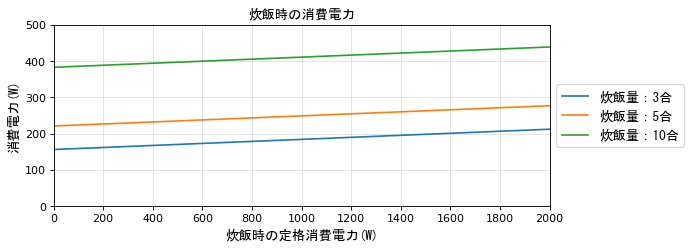

In [10]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('炊飯時の消費電力', fontdict={'fontproperties':fp})

for i,amt_ck in enumerate([3, 5, 10]):
    x_values =[x for x in range(0, 2200, 100)]
    y_values = [ P_opg_ck(p_rtd_ck, amt_ck) for p_rtd_ck in x_values]
    plt.plot(x_values, y_values, label= '炊飯量：' + str(amt_ck) + '合')
        
ax=plt.gca()
ax.set_xlabel('炊飯時の定格消費電力(W)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(0, 2200, 200)], minor=False)
ax.set_xbound(lower=0, upper=2000)

ax.set_ylabel('消費電力(W)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 600, 100)], minor=False)
ax.set_ybound(lower=0, upper=500)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

### 12.4　待機時の消費電力

日付$d$の時刻$t$における待機時の消費電力は、式(6)により計算される。

<p style="text-indent:2em">待機時の消費電力：</p>  
$$ 
\begin{equation*}
    P_{sby} = P_{rtd,sby} 
\end{equation*}
$$

<div style="text-align: right;"> (7) </div>

ここで、   

$P_{sby}$：待機時の消費電力[W]  
$P_{rtd,sby}$：待機時の定格消費電力[W]  

である。

In [11]:
def P_sby (Prtd_sby):
    '''待機時の消費電力[W]を計算する''' 
    # Prtd_sby：待機時の定格消費電力[W]    
    
    return Prtd_sby

### 12.5　標準条件

#### 12.5.1　機器仕様

4人世帯の標準的な機器仕様として、下表の設定を用いることができる。

|番号 |炊飯時の定格消費電力[W] |保温時の定格消費電力[W] |待機時の定格消費電力[W] |備考                |  
|:---:|:----------------------:|:----------------------:|:----------------------:|:------------------:|
|00   |1210                    |15.1                    |0                       |4人標準世帯の既定値 |       

In [12]:
Spec  = {
    'RiceCooker00' : {
        'Prtd_ck'  : 1210,
        'Prtd_kp'  : 15.1,
        'Prtd_sby' : 0
    }
}

#### 12.5.2　機器動作スケジュール

4人世帯の標準的なスケジュールとして、下表の設定を用いることができる。

|番号 |適用対象室 |備考                |  
|:---:|:---------:|:------------------:|  
|00   |台所       |4人標準世帯の既定値 |  

<p style="text-indent:2em">平日：</p>  

|時刻                     |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                    | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間_炊飯[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60|  0|  0|  0|  0|  0|  
|稼働時間_保温[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60|  0|  0|  0|  0|
|待機時間[\* 60 s]        | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0|  0| 60| 60| 60| 60| 

<p style="text-indent:2em">休日在宅：</p>  


|時刻                     |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                    | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間_炊飯[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60|  0|  0|  0|  0|  0|  0|  
|稼働時間_保温[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60|  0|  0|  0|  0|  0|
|待機時間[\* 60 s]        | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 00|  0| 60| 60| 60| 60| 60| 

<p style="text-indent:2em">休日外出：</p>  

|時刻                     |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                    | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間_炊飯[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  
|稼働時間_保温[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
|待機時間[\* 60 s]        | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 

In [13]:
Schedule= {
    'Schedule00' : {
        'Weekdays' : {
            'opg_ck' : [0]   *18 + [3600] *1 + [0]   *1 + [0]   *4,
            'opg_kp' : [0]   *18 + [0]    *1 + [3600]*1 + [0]   *4,
            'sby'    : [3600]*18 + [0]    *1 + [0]   *1 + [3600]*4
        },
        'Holidays_st' : {
            'opg_ck' : [0]   *17 + [3600] *1 + [0]   *1 + [0]   *5,
            'opg_kp' : [0]   *17 + [0]    *1 + [3600]*1 + [0]   *5,
            'sby'    : [3600]*17 + [0]    *1 + [0]   *1 + [3600]*5
        },
        'Holidays_go' : {
            'opg_ck' : [0]   *24,
            'opg_kp' : [0]   *24,
            'sby'    : [3600]*24
        }
    }
}

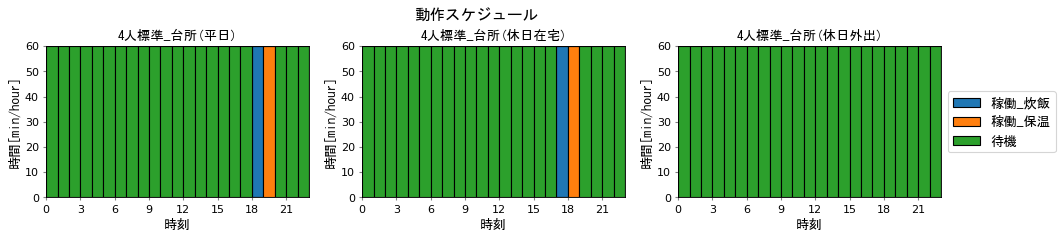

In [14]:
# 機器動作スケジュールの確認
chart_title = '動作スケジュール'
schedule_name = ('Schedule00','4人標準_台所' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg_ck','稼働_炊飯'),  ('opg_kp','稼働_保温'),  ('sby','待機') ]

y_value_sets = Schedule[schedule_name[0]] 


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = np.array(y_values[app_status_type[0]]) / 60
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 70, 10), minor=False)
    ax.set_ybound(lower=0, upper=60)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

#### 12.5.3　炊飯量および保温機能に関する居住者の使用行動

居住者の使用行動は、以下の1パターンを想定する。

|番号 |炊飯量[合] |保温機能 |備考                |    
|:---:|:---------:|:-------:|:------------------:|  
|00   |3          |使用する |4人標準世帯の既定値 |  

In [15]:
UserBehavior = {
    'UserBehavior00' : {
        'Amt_ck'     : 3,
        'keep_warm' : True
    }
}

### 付録1：サンプルコード

4人標準世帯の標準条件について、サンプルコードを示す。

In [16]:
def get_spec(app_type):
    '''機器仕様を取得する'''
    # app_type：機器タイプ
    
    # 機器仕様の取得
    try:
        spec = Spec[app_type]
    except:
        raise Exception('機器タイプの入力に不正があります。')     
    
    Prtd_ck = spec['Prtd_ck']
    Prtd_kp = spec['Prtd_kp']
    Prtd_sby = spec['Prtd_sby']
    
    return Prtd_ck, Prtd_kp, Prtd_sby

Example:

In [17]:
ex_Prtd_ck, ex_Prtd_kp, ex_Prtd_sby = get_spec('RiceCooker00')
ex_Prtd_ck, ex_Prtd_kp, ex_Prtd_sby

(1210, 15.1, 0)

In [18]:
def get_dt(time_use_type, time_of_day, schedule_name):
    '''機器動作スケジュールを取得する'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23）
    # schedule_name：スケジュール名
     
    # スケジュールの取得
    try:
        schedule_set = Schedule[schedule_name][time_use_type]
    except:
        raise Exception('スケジュール名の入力に不正があります。')    
               
    # 動作状態のタイプ
    app_status_types = list(schedule_set)
    
    # 動作状態ごとの継続時間[s]の取得
    for i, app_status_type in enumerate(app_status_types):
        if app_status_type == 'opg_ck':
            dt_opg_ck = schedule_set[app_status_type][time_of_day]
        elif app_status_type == 'opg_kp':
            dt_opg_kp = schedule_set[app_status_type][time_of_day]
        elif app_status_type == 'sby':
            dt_sby = schedule_set[app_status_type][time_of_day]
        else:
            raise Exception
            
    # 時間超過の確認
    check_duration([dt_opg_ck, dt_opg_kp, dt_sby]) 
    
    return dt_opg_ck, dt_opg_kp, dt_sby

Example:

In [19]:
ex_dt_opg_ck, ex_dt_opg_kp, ex_dt_sby = get_dt('Weekdays', 18, 'Schedule00')
ex_dt_opg_ck, ex_dt_opg_kp, ex_dt_sby

(3600, 0, 0)

In [20]:
def get_user_behavior(user_behavior_type):
    '''居住者の使用行動を取得する'''
    # user_behavior_type：居住者の使用行動タイプ
    
    # 居住者の使用行動の取得
    try:
        user_behavior = UserBehavior[user_behavior_type]
    except:
        raise Exception('居住者の使用行動タイプの入力に不正があります。')     
        
    Amt_ck = user_behavior['Amt_ck']
    keep_warm = user_behavior['keep_warm']
    
    return Amt_ck, keep_warm

Example:

In [21]:
ex_Amt_ck, ex_keep_warm = get_user_behavior('UserBehavior00')
ex_Amt_ck, ex_keep_warm

(3, True)

In [22]:
def calc_EE_opg(Prtd_ck, Prtd_kp, Prtd_sby, dt_opg_ck, dt_opg_kp, Amt_ck, keep_warm):
    '''稼働時における消費電力量[Wh]を計算する'''
    # Prtd_ck：炊飯時の定格消費電力[W]   
    # Prtd_kp：保温時の定格消費電力[W]  
    # Prtd_sby：待機時の定格消費電力[W]  
    # dt_opg_kp：炊飯が機能することによる稼働時間の合計[s]
    # dt_opg_ck：保温が機能することによる稼働時間の合計[s]
    # Amt_ck：炊飯量[合] 
    # keep_warm：保温機能を使用するか否か[True：使用する、False：使用しない](Boolean型)
    
    # 炊飯が機能することによる稼働時の消費電力[W]
    p_opg_ck = P_opg_ck (Prtd_ck, Amt_ck)
    # 炊飯が機能することによる稼働時の消費電力量[Wh]
    ee_opg_ck = EE_opg_ck(p_opg_ck, dt_opg_ck)
    
    # 保温が機能することによる稼働時の消費電力[W]
    p_opg_kp = P_opg_kp (Prtd_kp, Prtd_sby, keep_warm)
    # 保温が機能することによる稼働時の消費電力量[Wh]
    ee_opg_kp = EE_opg_kp(p_opg_kp, dt_opg_kp)
    
    # 稼働時における消費電力量[Wh]
    ee_opg = EE_opg(ee_opg_ck, ee_opg_kp)
    
    return ee_opg

Example:

In [23]:
ex_EE_opg = calc_EE_opg(ex_Prtd_ck, ex_Prtd_kp, ex_Prtd_sby, ex_dt_opg_ck, ex_dt_opg_kp, ex_Amt_ck, ex_keep_warm)
ex_EE_opg

189.86700000000002

In [24]:
def calc_EE_sby(Prtd_sby, dt_sby):
    '''稼働時における消費電力量[Wh]を計算する'''
    # dt_sby：待機時間の合計[s]
    # Prtd_sby：待機時の定格消費電力[W]      
    
    # 稼働時の消費電力[W]
    p_sby = P_sby (Prtd_sby)
       
    # '稼働時における消費電力量[Wh]
    ee_sby = EE_sby(p_sby, dt_sby)
    
    return ee_sby

Example:

In [25]:
ex_EE_sby = calc_EE_sby(ex_Prtd_sby, ex_dt_sby)
ex_EE_sby

0.0

In [26]:
def calc_EE_app(EE_opg, EE_sby):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時における消費電力量[Wh]
    # EE_sby：待機時における消費電力量[Wh]
    
    return EE_app(EE_opg, EE_sby)

Example:

In [27]:
ex_EE_app = calc_EE_app(ex_EE_opg, ex_EE_sby)
ex_EE_app

189.86700000000002

In [28]:
def calc_EE_RiceCooker_verP4(time_use_type, time_of_day, app_type, schedule_name, user_behavior_type):
    '''電気炊飯器の単位時間当たりの消費電力量を計算する（ver自立P4）'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23） 
    # app_type：機器タイプ  
    # schedule_name：スケジュール名
    # user_behavior_type：使用行動タイプ 
    
    # 機器動作スケジュール[s]を取得
    dt_opg_ck, dt_opg_kp, dt_sby = get_dt(time_use_type, time_of_day, schedule_name)
    
    # 機器仕様を取得
    Prtd_ck, Prtd_kp, Prtd_sby = get_spec(app_type)
    
    # 使用行動を取得
    Amt_ck, keep_warm = get_user_behavior(user_behavior_type)
    
    # 稼働時における消費電力量[Wh]を計算
    EE_opg = calc_EE_opg(Prtd_ck, Prtd_kp, Prtd_sby, dt_opg_ck, dt_opg_kp, Amt_ck, keep_warm)
    
    # 待機時における消費電力量[Wh]を計算
    EE_sby = calc_EE_sby(Prtd_sby,dt_sby)
    
    # 消費電力量[Wh]を計算
    EE_app = calc_EE_app (EE_opg, EE_sby)
    
    return EE_app, EE_opg, EE_sby

Example:

In [29]:
ex_EE_RiceCooker = calc_EE_RiceCooker_verP4('Weekdays', 18, 'RiceCooker00', 'Schedule00', 'UserBehavior00')
ex_EE_RiceCooker

(189.86700000000002, 189.86700000000002, 0.0)

### 付録2：サンプルコードによる時刻別消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより平日、休日在宅、休日外出の時刻別消費電力量を計算した結果を示す。

In [30]:
# 消費電力量の計算
# 入力
app_type = 'RiceCooker00'
schedule_name = ('Schedule00','4人標準_台所' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
time_of_day = [i for i in range(0, 24, 1)]
user_behavior_type = 'UserBehavior00'

# 消費電力量の計算
ee_app=[]
ee_opg=[]
ee_sby=[]
for time_use_type in time_use_types:
    _ee_app, _ee_opg, _ee_sby = np.vectorize(calc_EE_RiceCooker_verP4)(time_use_type[0], time_of_day, app_type, schedule_name[0], user_behavior_type)
    ee_app += [_ee_app]
    ee_opg += [_ee_opg]
    ee_sby += [_ee_sby]

# 消費電力量の計算結果
EE_Results= {
    'Weekdays'    : {'opg' : ee_opg[0],'sby' : ee_sby[0]},
    'Holidays_st' : {'opg' : ee_opg[1],'sby' : ee_sby[1]},
    'Holidays_go' : {'opg' : ee_opg[2],'sby' : ee_sby[2]}
}

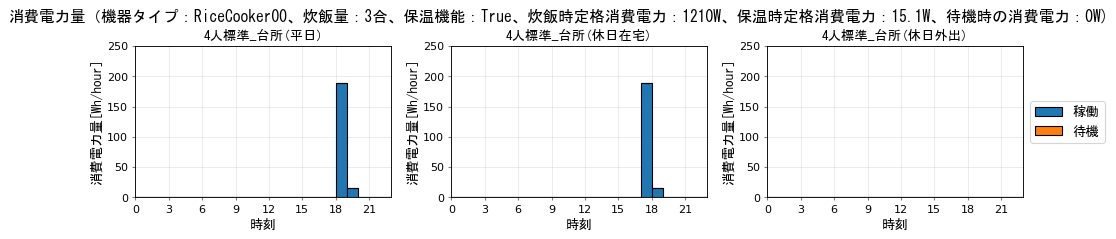

In [31]:
# 消費電力量の計算結果のグラフ 
chart_title = '消費電力量（' \
                + '機器タイプ：' + app_type + '、' \
                + '炊飯量：' + str(UserBehavior['UserBehavior00']['Amt_ck']) + '合、' \
                + '保温機能：' + str(UserBehavior['UserBehavior00']['keep_warm']) + '、' \
                + '炊飯時定格消費電力：' + str(Spec[app_type]['Prtd_ck']) + 'W、' \
                + '保温時定格消費電力：' + str(Spec[app_type]['Prtd_kp']) + 'W、' \
                + '待機時の消費電力：' + str(Spec[app_type]['Prtd_sby'])+ 'W' \
                + ')'
app_status_types = [ ('opg','稼働'), ('sby','待機') ]

y_value_sets = EE_Results


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = y_values[app_status_type[0]]
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('消費電力量[Wh/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 300, 50), minor=False)
    ax.set_ybound(lower=0, upper=250)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 付録3：サンプルコードによる年間消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより年間消費電力量を計算した結果を示す。

In [32]:
def calc_annual_EE_app(app_type, schedule_name, user_behavior_type):
    '''年間消費電力量[Wh/year]を計算する'''
    # app_type：機器タイプ  
    # schedule_name：スケジュール名 
    # user_behavior_type：使用行動タイプ
       
    def calc_daily_EE_app(schedule, app_type, schedule_name, user_behavior_type):
        '''1日あたりの消費電力量[Wh/day]を計算する'''
        hourly_EE_app = [ calc_EE_RiceCooker_verP4(schedule, t, app_type, schedule_name, user_behavior_type)[1] for t in range(0, 24, 1) ]
        return sum( hourly_EE_app )
    
    daily_EE_app = [ calc_daily_EE_app(CD.get_calendar()[CD.get_nday(ad)-1], app_type, schedule_name, user_behavior_type) for ad in  CD.get_Annual_Days() ]
    return sum( daily_EE_app )

In [33]:
# 年間消費電力量[kWh/year]
ex_annual_EE_app = calc_annual_EE_app('RiceCooker00', 'Schedule00' ,'UserBehavior00')
print('年間消費電力量：' + str(ex_annual_EE_app/1000) + ' kWh/年')

年間消費電力量：68.66394499999963 kWh/年
